In [1]:
import sys
import os
sys.path.append('..')
sys.path.append('../failure_directions/')
import src.svm_utils as svm_utils
import src.visualization_utils as viz_utils
import src.ds_utils as ds_utils
import torch
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from src.label_maps import CLASS_DICT
import pickle as pkl


sns.set()
BLUE = sns.color_palette("tab10")[0]
RED = sns.color_palette("tab10")[3]
ORANGE = sns.color_palette("tab10")[1]
BROWN = sns.color_palette("tab10")[5]
GRAY = sns.color_palette("tab10")[7]
GREEN = sns.color_palette("tab10")[2]

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
          'figure.figsize': (5, 3),
         'axes.labelsize': 14,
         'axes.titlesize':16,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
pylab.rcParams.update(params)

/mnt/cfs/home/saachij/conda_envs/ffcv_cfs/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
imagenet_label_list = np.array([CLASS_DICT['ImageNet'][u].split(',')[0] for u in range(1000)])

In [3]:
imagenet_label_list[[0, 938, 271, 42, 949]]

array(['tench', 'cauliflower', 'red wolf', 'agama', 'strawberry'],
      dtype='<U30')

In [4]:
beton_root = "/mnt/cfs/projects/correlated_errors/betons"
experiment_root = "/mnt/cfs/projects/correlated_errors/experiments/imagenet"

svm_name = "svm_imagenet"
name = os.path.join(experiment_root, f"svm_checkpoints/{svm_name}.pt") # SVM output file
svm_model_name = os.path.join(experiment_root, f"svm_checkpoints/{svm_name}_model.pkl") # SVM output file
model_root = os.path.join(experiment_root, "models")
model_ckpt = os.path.join(model_root, "vanilla_imagenet/version_1/checkpoints/checkpoint_last.pt")
loss_upweight_root = os.path.join(experiment_root, "loss_vec_files")
subset_root = os.path.join(experiment_root, "subset_index_files")

In [5]:
%cd ../failure_directions
processor = viz_utils.SVMProcessor(name, root=beton_root, checkpoint_path=model_ckpt, get_unlabeled=True)
%cd ../analysis_nbs


/mnt/cfs/home/saachij/src/failure-directions/failure_directions
-----------train_metrics--------------
{'Confusion Matrix': array([[180729,  70010],
       [ 96776, 164861]]),
 'Model Accuracy': 0.5106347682170905,
 'SVM Accuracy': 0.6744851469993591,
 'SVM Balanced Accuracy': 0.6754494309425354}
-----------val_metrics--------------
{'Confusion Matrix': array([[ 93594,  20160],
       [ 15188, 127332]]),
 'Model Accuracy': 0.5561235240406752,
 'SVM Accuracy': 0.8620694875717163,
 'SVM Balanced Accuracy': 0.8581039905548096}
-----------test_metrics--------------
{'Confusion Matrix': array([[16443,  6860],
       [ 5461, 21233]]),
 'Model Accuracy': 0.5339120347220834,
 'SVM Accuracy': 0.7535651922225952,
 'SVM Balanced Accuracy': 0.7505197525024414}
-----------unlabeled_metrics--------------
{'Confusion Matrix': array([[157693,  69114],
       [ 56202, 229460]]),
 'Model Accuracy': 0.5574229855854695,
 'SVM Accuracy': 0.7554661631584167,
 'SVM Balanced Accuracy': 0.7492654621601105}
Usi

100%|██████████| 5124/5124 [07:16<00:00, 11.74it/s]


Accuracy 0.5101507306098938


100%|██████████| 2563/2563 [04:09<00:00, 10.27it/s]


Accuracy 0.5561234951019287


100%|██████████| 500/500 [00:10<00:00, 45.91it/s]


Accuracy 0.5339320302009583


100%|██████████| 5125/5125 [01:31<00:00, 56.00it/s]


Accuracy 0.5574288368225098
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs


In [6]:
split = 'test'
test_dv = processor.metrics[f'{split}_metrics']['decision_values']
test_confs = processor.run_dict[split]['confs']
test_class = processor.metrics[f'{split}_metrics']['classes'] # 0 if female, 1 if male
test_pred_correct = processor.metrics[f'{split}_metrics']['ypred']
test_correct = processor.metrics[f'{split}_metrics']['ytrue']

In [7]:
caption_out = torch.load(os.path.join(experiment_root, "imagenet_clip_results_5_20_upper_noun.pt"))

0
0.748526936026936
NEG ['a photo of a close-up fish' 'a photo of a blurry fish']
POS ['a photo of a orange fish with a person'
 'a photo of a yellow fish on a brown background']


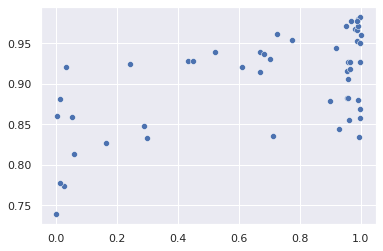

---- CONFIDENCE ------


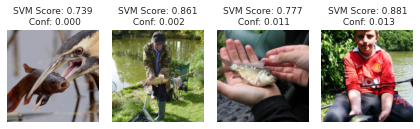

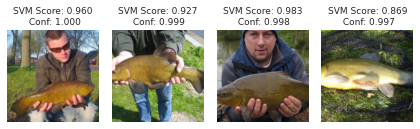

---- SVM ------


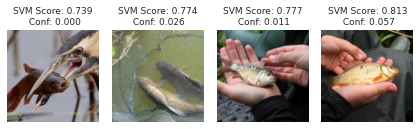

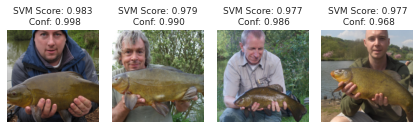

938
0.842179917879806
NEG ['a photo of a green food with a person' 'a photo of a blurry food inside']
POS ['a photo of a yellow food on a white background'
 'a photo of a yellow food one the ground']


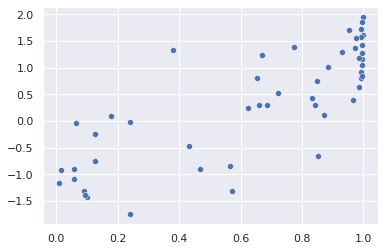

---- CONFIDENCE ------


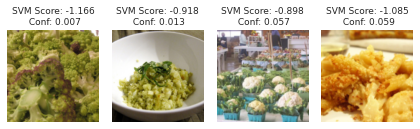

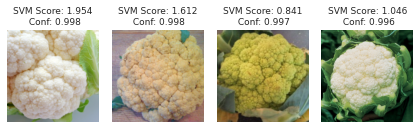

---- SVM ------


271
0.8344808966795121
NEG ['a photo of a white canine outside' 'a photo of a white canine inside']
POS ['a photo of a orange canine on a blue background'
 'a photo of a orange canine in a house']


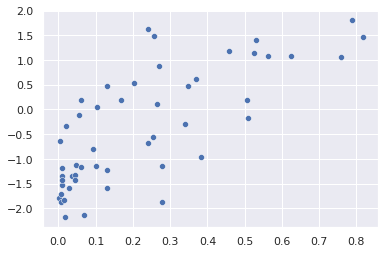

---- CONFIDENCE ------


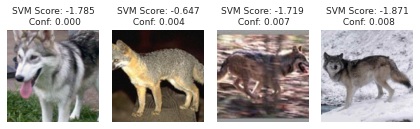

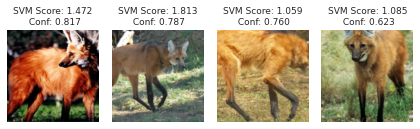

---- SVM ------


42
0.8292973124300111
NEG ['a photo of a blurry reptile on a white background'
 'a photo of a blurry reptile on the ground']
POS ['a photo of a blue reptile' 'a photo of a blue reptile outside']


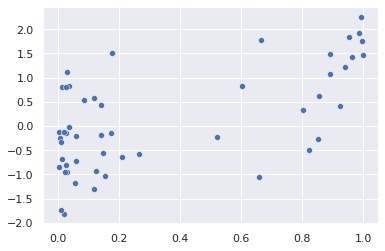

---- CONFIDENCE ------


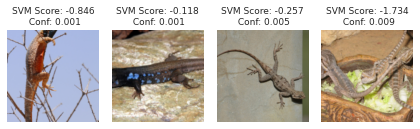

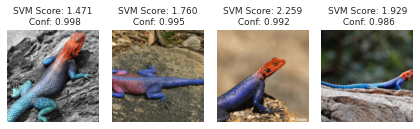

---- SVM ------


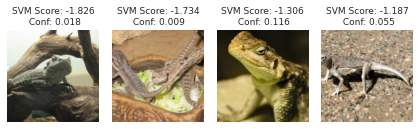

949
0.8240959119496856
NEG ['a photo of a yellow fruit outside' 'a photo of a brown fruit outside']
POS ['a photo of a close-up fruit on a white background'
 'a photo of a red fruit on a white background']


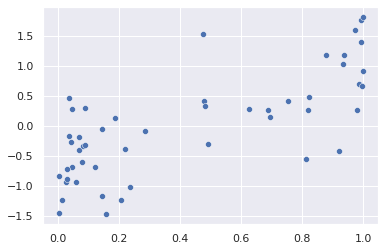

---- CONFIDENCE ------


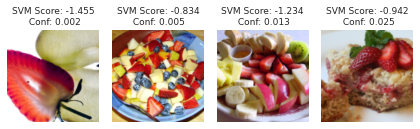

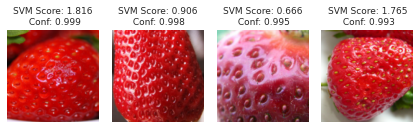

---- SVM ------


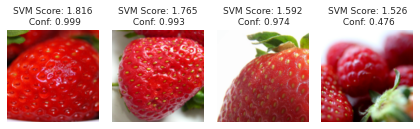

In [19]:
# display extremes for original model
c_list = [0, 938, 271, 42, 949]
# c_list = np.argsort(processor.metrics['cv_scores'])[::-1][0:40]
for c in c_list:
    print(c)
    print(processor.metrics['cv_scores'][c])
    print("NEG", caption_out[c]['neg_captions'][:2])
    print("POS", caption_out[c]['pos_captions'][:2])

    processor.display_extremes(c, split='test', columns=4, rows=1, filename=f"figures/imagenet/{c}_extremes")

In [8]:
import src.clip_utils as clip_utils

In [9]:
import importlib
importlib.reload(clip_utils)

<module 'src.clip_utils' from '/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/clip_utils.py'>

In [14]:
clip_analyzer = viz_utils.ClipAnalyzer(
    processor=processor, svm_model_name=svm_model_name, caption_set_name="IMAGENET", class_names=imagenet_label_list)

100%|██████████| 5125/5125 [01:55<00:00, 44.29it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sour

consistent with old results 1.0


 52%|█████▏    | 521/999 [00:00<00:00, 5197.98it/s]

tench
goldfish
great white shark
tiger shark
hammerhead
electric ray
stingray
cock
hen
ostrich
brambling
goldfinch
house finch
junco
indigo bunting
robin
bulbul
jay
magpie
chickadee
water ouzel
kite
bald eagle
vulture
great grey owl
European fire salamander
common newt
eft
spotted salamander
axolotl
bullfrog
tree frog
tailed frog
loggerhead
leatherback turtle
mud turtle
terrapin
box turtle
banded gecko
common iguana
American chameleon
whiptail
agama
frilled lizard
alligator lizard
Gila monster
green lizard
African chameleon
Komodo dragon
African crocodile
American alligator
triceratops
thunder snake
ringneck snake
hognose snake
green snake
king snake
garter snake
water snake
vine snake
night snake
boa constrictor
rock python
Indian cobra
green mamba
sea snake
horned viper
diamondback
sidewinder
trilobite
harvestman
scorpion
black and gold garden spider
barn spider
garden spider
black widow
tarantula
wolf spider
tick
centipede
black grouse
ptarmigan
ruffed grouse
prairie chicken
peacock

100%|██████████| 999/999 [00:03<00:00, 302.26it/s] 

palace
panpipe
paper towel
parachute
parallel bars
park bench
parking meter
passenger car
patio
pay-phone
pedestal
pencil box
pencil sharpener
perfume
Petri dish
photocopier
pick
pickelhaube
picket fence
pickup
pier
piggy bank
pill bottle
pillow
ping-pong ball
pinwheel
pirate
pitcher
plane
planetarium
plastic bag
plate rack
plow
plunger
Polaroid camera
pole
police van
poncho
pool table
pop bottle
pot
potter's wheel
power drill
prayer rug
printer
prison
projectile
projector
puck
punching bag
purse
quill
quilt
racer
racket
radiator
radio
radio telescope
rain barrel
recreational vehicle
reel
reflex camera
refrigerator
remote control
restaurant
revolver
rifle
rocking chair
rotisserie
rubber eraser
rugby ball
rule
running shoe
safe
safety pin
saltshaker
sandal
sarong
sax
scabbard
scale
school bus
schooner
scoreboard
screen
screw
screwdriver
seat belt
sewing machine
shield
shoe shop
shoji
shopping basket
shopping cart
shovel
shower cap
shower curtain
ski
ski mask
sleeping bag
slide rule
slid

In [15]:
def get_cdf(arr, K_range=None):
    out = []
    if K_range is None:
        K_range = np.arange(10, len(arr), 10)
    for K in K_range:
        out.append(arr[:K].mean())
    out = np.array(out)
    return out, K_range

In [16]:
import tqdm
saved_caption_and_most_relevant_imgs = {}
df_dict = {}
direction_mapping = {
    'pos': 'Positive',
    'neg': 'Negative'
}
for METHOD in ['CLASSIFY']:
    all_dfs = []
    for target_class in tqdm.tqdm(range(1000)):
        print(processor.metrics['cv_scores'][target_class])
        
        result = caption_out[target_class]
        cdfs = {}
        class_mask = test_class==target_class
        masked_indices = np.arange(len(test_class))[class_mask]
        # K_range = np.arange(10, len(masked_indices), 10)
        K_range=np.arange(4, len(masked_indices), 5)
        for caption_index in range(1):
            for direction in ['pos', 'neg']:
                caption_text = result[f'{direction}_captions'][caption_index]
                print(f"{direction}: {caption_text}")
                top_caption_latent = torch.tensor(result[f'{direction}_latents'][caption_index]).cuda()

                image_latents = clip_analyzer.clip_features[split][class_mask].cuda()
                image_angles = clip_utils.order_descriptions_angle(mean_point=top_caption_latent.unsqueeze(0), query_points=image_latents)
                image_order = np.argsort(image_angles)[::-1]
                saved_caption_and_most_relevant_imgs[(METHOD, target_class, caption_index, direction)] = (masked_indices[image_order], caption_text)
                cdfs[direction_mapping[direction]], _ = get_cdf(test_correct[masked_indices[image_order]], K_range)
                # uncomment this to display the images
#                 processor._display_images(taken_index=masked_indices[image_order], taken_scores=image_angles[image_order],
#                             taken_confs=image_angles[image_order], split="test")

            df = pd.DataFrame()
            df['K'] = K_range
            for d, v in cdfs.items():
                df[d] = v
            df['Overall Class'] = test_correct[masked_indices].mean()
            df = df.melt('K', var_name='Order', value_name='Accuracy')
            all_dfs.append(df)
#             sns.lineplot(data=df, x='K', y='Accuracy', hue='Direction')
#             plt.axhline(y=test_correct[masked_indices].mean(), xmin=0, xmax=K_range[-1], color='gray')
#             plt.show()
    df_dict[METHOD] = all_dfs
    

  0%|          | 4/1000 [00:00<00:25, 39.01it/s]

0.748526936026936
pos: a photo of a orange fish with a person
neg: a photo of a close-up fish
0.7250982961992136
pos: a photo of a orange fish inside
neg: a photo of a white fish outside
0.761786306562426
pos: a photo of a brown fish on a white background
neg: a photo of a far away fish in a tank
0.7194616977225672
pos: a photo of a white fish on a white background
neg: a photo of a black fish
0.7143075346080461
pos: a photo of a black fish on a blue background
neg: a photo of a close-up fish with a person
0.7169401104888188
pos: a photo of a fish
neg: a photo of a white fish underwater
0.6196732954545454
pos: a photo of a black fish in a tank
neg: a photo of a white fish
0.7404063282998298
pos: a photo of a red bird
neg: a photo of a brown bird outside
0.6916666666666667
pos: a photo of a orange bird on a white background
neg: a photo of a bird
0.7183104395604396
pos: a photo of a close-up bird on a white background
neg: a photo of a group of bird flying
0.7057002418240951
pos: a phot

  4%|▍         | 38/1000 [00:00<00:06, 137.66it/s]

neg: a photo of a black bird outside
0.7172619047619048
pos: a photo of a brown bird on a white background
neg: a photo of a black bird
0.7468971631205674
pos: a photo of a close-up bird perched
neg: a photo of a black bird flying
0.7123538011695907
pos: a photo of a black bird on a green background
neg: a photo of a white bird
0.8541666666666666
pos: a photo of a orange bird on a black background
neg: a photo of a white bird flying
0.7733522996680892
pos: a photo of a yellow amphibian on a black background
neg: a photo of a red amphibian on a brown background
0.5996558129370629
pos: a photo of a brown amphibian on a white background
neg: a photo of a yellow amphibian outside
0.7641900510204082
pos: a photo of a orange amphibian inside
neg: a photo of a brown amphibian
0.7876344086021505
pos: a photo of a brown amphibian
neg: a photo of a white amphibian on a white background
0.7883333333333333
pos: a photo of a white amphibian inside
neg: a photo of a brown amphibian on a brown backgr

  7%|▋         | 71/1000 [00:00<00:06, 153.24it/s]

pos: a photo of a brown reptile outside
neg: a photo of a black reptile inside
0.7342883530223683
pos: a photo of a black reptile inside
neg: a photo of a close-up reptile on a green background
0.6738330436438867
pos: a photo of a yellow reptile on a white background
neg: a photo of a black reptile outside
0.7631084659380083
pos: a photo of a green reptile in a tank
neg: a photo of a far away reptile in the grass
0.6803117744193259
pos: a photo of a white reptile on a black background
neg: a photo of a yellow reptile inside
0.7288245356793743
pos: a photo of a yellow reptile on a white background
neg: a photo of a brown reptile
0.7255522462149417
pos: a photo of a yellow reptile on a brown background
neg: a photo of a close-up reptile inside
0.6681515799477311
pos: a photo of a orange reptile on a black background
neg: a photo of a group of reptile on the ground
0.6475535168195719
pos: a photo of a orange reptile on a brown background
neg: a photo of a close-up reptile
0.71963922764227

 11%|█         | 108/1000 [00:00<00:05, 167.46it/s]

pos: a photo of a close-up bird on a white background
neg: a photo of a black bird flying
0.7769430874935462
pos: a photo of a orange bird on a black background
neg: a photo of a blue bird outside
0.6825964979634704
pos: a photo of a yellow bird on a black background
neg: a photo of a blue bird in a cage
0.7270833333333333
pos: a photo of a black bird on a black background
neg: a photo of a yellow bird in the air
0.6775387049183241
pos: a photo of a orange bird on a brown background
neg: a photo of a yellow bird flying
0.7309157509157509
pos: a photo of a yellow bird in a cage
neg: a photo of a brown bird flying
0.7139195078185081
pos: a photo of a close-up bird perched
neg: a photo of a blurry bird on a green background
0.7729500464515597
pos: a photo of a white bird inside
neg: a photo of a orange bird
0.8144927536231883
pos: a photo of a group of bird
neg: a photo of a black bird in the grass
0.7454545454545454
pos: a photo of a green bird on a black background
neg: a photo of a red

 14%|█▍        | 145/1000 [00:00<00:04, 175.56it/s]

pos: a photo of a group of invertebrate on a brown background
neg: a photo of a green invertebrate on the ground
0.7759609573579338
pos: a photo of a red invertebrate on a green background
neg: a photo of a black invertebrate outside
0.7076841691750607
pos: a photo of a white invertebrate on a green background
neg: a photo of a black invertebrate
0.7604166666666667
pos: a photo of a blue invertebrate on a brown background
neg: a photo of a group of invertebrate in the grass
0.7812627774868148
pos: a photo of a white bird on a black background
neg: a photo of a black bird flying
0.7116927337895079
pos: a photo of a red bird flying
neg: a photo of a yellow bird in the grass
0.747097985660635
pos: a photo of a red bird in the air
neg: a photo of a white bird on the ground
0.5712022651677824
pos: a photo of a orange bird on the ground
neg: a photo of a white bird in the air
0.7243797195253506
pos: a photo of a blue bird on the ground
neg: a photo of a white bird flying
0.6979850046860356
p

 18%|█▊        | 183/1000 [00:01<00:04, 175.73it/s]

neg: a photo of a black canine inside
0.6762820512820513
pos: a photo of a group of canine on a green background
neg: a photo of a brown canine outside
0.716594827586207
pos: a photo of a orange canine on a blue background
neg: a photo of a green canine outside
0.7282418380089324
pos: a photo of a black canine on a blue background
neg: a photo of a white canine with a person
0.7080867346938775
pos: a photo of a canine
neg: a photo of a yellow canine on a brown background
0.6986236802413273
pos: a photo of a white canine on a white background
neg: a photo of a brown canine on the ground
0.6569095383697516
pos: a photo of a group of canine outside
neg: a photo of a brown canine on the ground
0.6531092783398661
pos: a photo of a group of canine on the ground
neg: a photo of a green canine inside
0.6771457843103821
pos: a photo of a white canine on a green background
neg: a photo of a black canine on a black background
0.6547619047619048
pos: a photo of a white canine outside
neg: a photo 

 22%|██▏       | 219/1000 [00:01<00:04, 168.33it/s]

0.6745698374286423
pos: a photo of a green canine on a blue background
neg: a photo of a yellow canine on the ground
0.6740701255626629
pos: a photo of a black canine
neg: a photo of a brown canine in the grass
0.6769563008130082
pos: a photo of a blue canine
neg: a photo of a black canine in the grass
0.7193939393939395
pos: a photo of a black canine on a green background
neg: a photo of a white canine inside
0.6678542544304022
pos: a photo of a white canine on a green background
neg: a photo of a orange canine
0.7743494867510146
pos: a photo of a brown canine on the ground
neg: a photo of a yellow canine in a house
0.6982019234048358
pos: a photo of a yellow canine on the ground
neg: a photo of a close-up canine on a blue background
0.6144754346587349
pos: a photo of a white canine on a blue background
neg: a photo of a red canine with a person
0.6983099604458828
pos: a photo of a yellow canine outside
neg: a photo of a black canine
0.6811572774072774
pos: a photo of a black canine o

 25%|██▌       | 254/1000 [00:01<00:04, 165.91it/s]

pos: a photo of a black canine on a green background
neg: a photo of a close-up canine with a person
0.6156407196545923
pos: a photo of a orange canine
neg: a photo of a white canine in the grass
0.769375
pos: a photo of a orange canine on a green background
neg: a photo of a far away canine inside
0.6134342706080269
pos: a photo of a black canine on a black background
neg: a photo of a brown canine
0.6137333965844403
pos: a photo of a brown canine on a blue background
neg: a photo of a yellow canine inside
0.6148788648883323
pos: a photo of a orange canine in the grass
neg: a photo of a brown canine
0.683606767495514
pos: a photo of a brown canine on a blue background
neg: a photo of a canine in a house
0.678448909580985
pos: a photo of a black canine
neg: a photo of a blurry canine inside
0.7122139969707001
pos: a photo of a blue canine in the forest
neg: a photo of a white canine on a black background
0.7308874632451217
pos: a photo of a orange canine on a white background
neg: a ph

 29%|██▉       | 288/1000 [00:01<00:04, 164.87it/s]

pos: a photo of a orange canine on a brown background
neg: a photo of a white canine in the forest
0.7183689024390243
pos: a photo of a orange canine
neg: a photo of a black canine outside
0.758105279095619
pos: a photo of a close-up canine outside
neg: a photo of a orange canine
0.6946016617790811
pos: a photo of a orange canine on a white background
neg: a photo of a black canine outside
0.6246756979453446
pos: a photo of a orange canine in the grass
neg: a photo of a blurry canine on the ground
0.723448902012694
pos: a photo of a black canine on a black background
neg: a photo of a white canine on the ground
0.6410509849761061
pos: a photo of a red canine with a person
neg: a photo of a close-up canine on the ground
0.6341991341991342
pos: a photo of a blue canine with a person
neg: a photo of a white canine outside
0.7163919413919414
pos: a photo of a white canine on a brown background
neg: a photo of a far away canine inside
0.8344808966795121
pos: a photo of a orange canine on a 

 32%|███▏      | 322/1000 [00:01<00:04, 164.87it/s]

pos: a photo of a black mammal on a green background
neg: a photo of a mammal inside
0.6022114347357066
pos: a photo of a white mammal on a green background
neg: a photo of a mammal inside
0.7398255813953488
pos: a photo of a white mammal on a blue background
neg: a photo of a brown mammal
0.7893470283862074
pos: a photo of a orange mammal on a green background
neg: a photo of a blurry mammal
0.7807195963606587
pos: a photo of a far away mammal outside
neg: a photo of a red mammal inside
0.7423714036617263
pos: a photo of a green invertebrate on the ground
neg: a photo of a orange invertebrate inside
0.7644450800915332
pos: a photo of a orange invertebrate on the ground
neg: a photo of a brown invertebrate inside
0.6953760162601627
pos: a photo of a black invertebrate on a blue background
neg: a photo of a yellow invertebrate inside
0.6215651315931167
pos: a photo of a black invertebrate on a blue background
neg: a photo of a yellow invertebrate outside
0.6446428571428571
pos: a photo 

 36%|███▌      | 356/1000 [00:02<00:03, 164.66it/s]

0.724375775296828
pos: a photo of a red invertebrate on the ground
neg: a photo of a yellow invertebrate
0.7810939945000647
pos: a photo of a close-up mammal on a white background
neg: a photo of a blurry mammal inside
0.724082415023464
pos: a photo of a far away mammal
neg: a photo of a white mammal inside
0.6986111111111111
pos: a photo of a white mammal on a black background
neg: a photo of a mammal on a brown background
0.732485764876111
pos: a photo of a close-up rodent
neg: a photo of a far away rodent outside
0.7034313725490197
pos: a photo of a yellow rodent on a blue background
neg: a photo of a far away rodent with a person
0.7448621979981832
pos: a photo of a yellow rodent on a white background
neg: a photo of a black rodent in the forest
0.7185559006211181
pos: a photo of a group of rodent on a white background
neg: a photo of a red rodent inside
0.7556132434907115
pos: a photo of a brown rodent on a blue background
neg: a photo of a far away rodent with a person
0.70512820

 39%|███▉      | 391/1000 [00:02<00:03, 167.53it/s]

0.808694031736406
pos: a photo of a blue mammal on a brown background
neg: a photo of a black mammal inside
0.6898281447766574
pos: a photo of a green mammal on a blue background
neg: a photo of a blurry mammal
0.7360874018436326
pos: a photo of a group of primate on a blue background
neg: a photo of a white primate inside
0.7004179554236762
pos: a photo of a close-up primate
neg: a photo of a blurry primate inside
0.7445549242424243
pos: a photo of a group of primate on a blue background
neg: a photo of a far away primate in the grass
0.746347090489618
pos: a photo of a yellow primate in a tree
neg: a photo of a black primate inside
0.6163636363636363
pos: a photo of a black primate
neg: a photo of a brown primate on the ground
0.7654594187488925
pos: a photo of a yellow primate on a black background
neg: a photo of a blurry primate in a tree
0.7435743506374093
pos: a photo of a orange primate
neg: a photo of a black primate inside
0.653163756550603
pos: a photo of a yellow primate on

 43%|████▎     | 427/1000 [00:02<00:03, 171.78it/s]

0.7297255838254234
pos: a photo of a yellow device on a green background
neg: a photo of a far away device on a black background
0.6345258515069836
pos: a photo of a black entity on a brown background
neg: a photo of a close-up entity inside
0.6466714559386972
pos: a photo of a group of entity on a white background
neg: a photo of a entity inside
0.8072116205452542
pos: a photo of a red device on a green background
neg: a photo of a blurry device on a table
0.7933802050518357
pos: a photo of a black device on a green background
neg: a photo of a blurry device inside
0.7431418219461697
pos: a photo of a black vehicle on the road
neg: a photo of a close-up vehicle
0.7968621990736313
pos: a photo of a aircraft on a brown background
neg: a photo of a far away aircraft inside
0.6958333333333333
pos: a photo of a yellow aircraft on a white background
neg: a photo of a black aircraft
0.6925
pos: a photo of a yellow structure on a brown background
neg: a photo of a far away structure
0.7601865

 46%|████▋     | 465/1000 [00:02<00:02, 179.66it/s]

pos: a photo of a green entity on a brown background
neg: a photo of a blurry entity
0.5720000000000001
pos: a photo of a blue vessel in the ocean
neg: a photo of a far away vessel docked
0.6073835784313726
pos: a photo of a green wheeled vehicle on a brown background
neg: a photo of a blurry wheeled vehicle
0.766645861243048
pos: a photo of a red structure on a brown background
neg: a photo of a far away structure outside
0.7737830401461956
pos: a photo of a red vessel on a blue background
neg: a photo of a black vessel docked
0.7123901284651792
pos: a photo of a red entity on a blue background
neg: a photo of a yellow entity
0.7731734411421911
pos: a photo of a far away vessel on a brown background
neg: a photo of a close-up vessel inside
0.6171374985558338
pos: a photo of a orange container on a table
neg: a photo of a white container outside
0.6884850060816878
pos: a photo of a orange covering on a white background
neg: a photo of a black covering outside
0.6526251526251526
pos: a 

 50%|█████     | 504/1000 [00:03<00:02, 185.23it/s]

neg: a photo of a far away vessel inside
0.7626347303135679
pos: a photo of a blue implement on a white background
neg: a photo of a close-up implement inside
0.692888123603872
pos: a photo of a orange entity on a green background
neg: a photo of a far away entity on a white background
0.7184210526315788
pos: a photo of a orange device on a blue background
neg: a photo of a close-up device outside
0.6651175031296233
pos: a photo of a green device on a brown background
neg: a photo of a group of device outside
0.7174127237285133
pos: a photo of a black equipment on a table
neg: a photo of a close-up equipment
0.7860696517412935
pos: a photo of a white container on a white background
neg: a photo of a close-up container inside
0.8323506786006786
pos: a photo of a red device on a green background
neg: a photo of a device with a hand
0.7394649621212122
pos: a photo of a blue device with a person
neg: a photo of a far away device on a table
0.7622492739920308
pos: a photo of a yellow contai

 54%|█████▍    | 541/1000 [00:03<00:02, 174.39it/s]

pos: a photo of a far away vessel on a blue background
neg: a photo of a close-up vessel docked
0.659902304902305
pos: a photo of a black wheeled vehicle on a blue background
neg: a photo of a far away wheeled vehicle
0.7020850040096231
pos: a photo of a orange implement on a blue background
neg: a photo of a white implement
0.7588827838827839
pos: a photo of a group of device on a white background
neg: a photo of a black device with a person
0.8288529787480348
pos: a photo of a brown covering on a blue background
neg: a photo of a blurry covering
0.7142693373645754
pos: a photo of a white entity on a black background
neg: a photo of a blurry entity
0.6607322551662174
pos: a photo of a blurry furniture in a house
neg: a photo of a close-up furniture inside
0.7362492787564063
pos: a photo of a yellow device on a white background
neg: a photo of a green device inside
0.7419772256728778
pos: a photo of a orange entity on a white background
neg: a photo of a blurry entity inside
0.64810141

 58%|█████▊    | 577/1000 [00:03<00:02, 172.84it/s]

pos: a photo of a black equipment on a green background
neg: a photo of a white equipment outside
0.7659755198103904
pos: a photo of a blue appliance on a table
neg: a photo of a green appliance
0.7618626165501166
pos: a photo of a device with a hand
neg: a photo of a blurry device
0.7487135506003431
pos: a photo of a red device on a brown background
neg: a photo of a blurry device inside
0.8074439315199764
pos: a photo of a brown wheeled vehicle on a blue background
neg: a photo of a far away wheeled vehicle
0.7263157894736842
pos: a photo of a black furniture in a house
neg: a photo of a close-up furniture inside
0.6298290286123822
pos: a photo of a white container on a white background
neg: a photo of a container inside
0.701461038961039
pos: a photo of a black appliance with a person
neg: a photo of a close-up appliance inside
0.7022730734084679
pos: a photo of a brown instrumentality on a blue background
neg: a photo of a close-up instrumentality on a black background
0.7104166666

 60%|█████▉    | 595/1000 [00:03<00:02, 169.23it/s]

0.6925899621212122
pos: a photo of a orange entity inside
neg: a photo of a close-up entity on a green background
0.7217664092664093
pos: a photo of a blue device on a green background
neg: a photo of a blurry device inside
0.6993371212121212
pos: a photo of a black structure inside
neg: a photo of a close-up structure outside
0.7511973180076629
pos: a photo of a red structure on a green background
neg: a photo of a brown structure
0.6796443162701273
pos: a photo of a black structure on a green background
neg: a photo of a far away structure inside
0.6689302884615385
pos: a photo of a device
neg: a photo of a blue device with a hand
0.5822510822510822
pos: a photo of a group of device on a white background
neg: a photo of a close-up device outside
0.524731182795699
pos: a photo of a red instrumentality on a green background
neg: a photo of a blue instrumentality with a hand
0.7226479915433404
pos: a photo of a group of vehicle on a brown background
neg: a photo of a far away vehicle on

 63%|██████▎   | 631/1000 [00:03<00:02, 169.02it/s]

pos: a photo of a black wheeled vehicle outside
neg: a photo of a green wheeled vehicle
0.7238745629370629
pos: a photo of a red device on a black background
neg: a photo of a white device inside
0.694047619047619
pos: a photo of a group of entity on a blue background
neg: a photo of a green entity inside
0.7367836257309941
pos: a photo of a black entity on a blue background
neg: a photo of a close-up entity outside
0.7233327639713206
pos: a photo of a close-up device on a blue background
neg: a photo of a blurry device with a person
0.6581644074120134
pos: a photo of a orange entity on a white background
neg: a photo of a close-up entity
0.6708699633699634
pos: a photo of a black vessel on a green background
neg: a photo of a white vessel inside
0.71685378241112
pos: a photo of a close-up covering on a green background
neg: a photo of a white covering outside
0.6541977728007963
pos: a photo of a green device with a person
neg: a photo of a far away device inside
0.7241767353707652
pos

 67%|██████▋   | 666/1000 [00:03<00:01, 168.89it/s]

pos: a photo of a green instrumentality outside
neg: a photo of a close-up instrumentality on a blue background
0.7437633642195296
pos: a photo of a red container on a blue background
neg: a photo of a green container inside
0.7239034550355306
pos: a photo of a white furniture on a blue background
neg: a photo of a furniture outside
0.7383028189479803
pos: a photo of a brown structure on a green background
neg: a photo of a far away structure outside
0.7763004940424295
pos: a photo of a red device on a white background
neg: a photo of a group of device with a person
0.7123342025288721
pos: a photo of a brown appliance on a black background
neg: a photo of a far away appliance inside
0.6764846743295019
pos: a photo of a group of entity on a white background
neg: a photo of a blue entity
0.7459084072239227
pos: a photo of a close-up container on a black background
neg: a photo of a orange container with a person
0.7161234991423671
pos: a photo of a white bus on a black background
neg: a 

 70%|███████   | 700/1000 [00:04<00:01, 168.60it/s]

neg: a photo of a green covering
0.7286150478710003
pos: a photo of a black device with a hand
neg: a photo of a group of device inside
0.7136083451872925
pos: a photo of a brown structure on a blue background
neg: a photo of a green structure inside
0.7027532745255279
pos: a photo of a yellow device on a white background
neg: a photo of a group of device with a person
0.783465513097813
pos: a photo of a green device on a blue background
neg: a photo of a blurry device outside
0.7153024152650274
pos: a photo of a orange device on a blue background
neg: a photo of a close-up device inside
0.7150641025641025
pos: a photo of a black device on a blue background
neg: a photo of a device with a hand
0.8312637362637363
pos: a photo of a orange device on a blue background
neg: a photo of a black device inside
0.7874930893409995
pos: a photo of a yellow equipment on a green background
neg: a photo of a black equipment with a person
0.6246919996919997
pos: a photo of a yellow entity on a white b

 74%|███████▎  | 735/1000 [00:04<00:01, 169.40it/s]

0.7308640136621788
pos: a photo of a orange covering on a blue background
neg: a photo of a brown covering inside
0.7893675988914084
pos: a photo of a yellow structure on a green background
neg: a photo of a black structure inside
0.7450828157349896
pos: a photo of a red wheeled vehicle on a blue background
neg: a photo of a far away wheeled vehicle
0.6799952255908331
pos: a photo of a black device on a blue background
neg: a photo of a close-up device outside
0.7358409610983982
pos: a photo of a close-up container on a table
neg: a photo of a container outside
0.6996498771498771
pos: a photo of a red vessel on a brown background
neg: a photo of a white vessel
0.7184411690319334
pos: a photo of a red entity on a green background
neg: a photo of a black entity inside
0.6967366038659163
pos: a photo of a yellow equipment on a blue background
neg: a photo of a green equipment inside
0.6821488757282488
pos: a photo of a yellow device on a blue background
neg: a photo of a black device insi

 77%|███████▋  | 769/1000 [00:04<00:01, 168.56it/s]

pos: a photo of a black implement on a table
neg: a photo of a green implement with a person
0.749161877394636
pos: a photo of a blurry covering with a person
neg: a photo of a close-up covering on a black background
0.7300906640529282
pos: a photo of a black wheeled vehicle
neg: a photo of a far away wheeled vehicle outside
0.7362797602000879
pos: a photo of a orange implement on a green background
neg: a photo of a implement
0.7327528961853559
pos: a photo of a yellow device on a black background
neg: a photo of a red device inside
0.6441885964912281
pos: a photo of a group of instrumentality on a white background
neg: a photo of a green instrumentality inside
0.7525550314465408
pos: a photo of a far away device on a black background
neg: a photo of a close-up device outside
0.7848850983179341
pos: a photo of a green entity on a blue background
neg: a photo of a close-up entity
0.78125
pos: a photo of a white wheeled vehicle parked
neg: a photo of a far away wheeled vehicle inside
0.

 80%|████████  | 803/1000 [00:04<00:01, 165.20it/s]

0.7248514013541174
pos: a photo of a group of device on a white background
neg: a photo of a close-up device outside
0.667023890298723
pos: a photo of a red implement on a blue background
neg: a photo of a close-up implement with a hand
0.746246722027972
pos: a photo of a brown entity outside
neg: a photo of a yellow entity on a white background
0.7529652043678856
pos: a photo of a yellow appliance on a black background
neg: a photo of a appliance inside
0.6636661186213615
pos: a photo of a blue covering on a table
neg: a photo of a far away covering inside
0.697552631246438
pos: a photo of a black structure on a white background
neg: a photo of a white structure inside
0.6968253968253968
pos: a photo of a covering on a white background
neg: a photo of a blurry covering inside
0.7735558712121212
pos: a photo of a group of container on a blue background
neg: a photo of a brown container inside
0.719715250965251
pos: a photo of a yellow wheeled vehicle on a blue background
neg: a photo o

 84%|████████▎ | 837/1000 [00:05<00:00, 164.71it/s]

pos: a photo of a orange implement on a brown background
neg: a photo of a yellow implement
0.7279829545454546
pos: a photo of a red wheeled vehicle inside
neg: a photo of a white wheeled vehicle parked
0.7141037434010559
pos: a photo of a black device on a white background
neg: a photo of a blurry device
0.7415796963946869
pos: a photo of a group of entity
neg: a photo of a far away entity outside
0.7451005431268589
pos: a photo of a black wheeled vehicle on the road
neg: a photo of a far away wheeled vehicle
0.68
pos: a photo of a orange structure on a blue background
neg: a photo of a blurry structure inside
0.7298136645962733
pos: a photo of a green device on a table
neg: a photo of a white device
0.7497015994270708
pos: a photo of a brown device
neg: a photo of a blurry device on a green background
0.656964834414476
pos: a photo of a blue entity on a white background
neg: a photo of a brown entity
0.6883900029061318
pos: a photo of a close-up structure on a green background
neg: a

 87%|████████▋ | 872/1000 [00:05<00:00, 167.93it/s]

0.643960440121226
pos: a photo of a brown entity on a black background
neg: a photo of a blurry entity inside
0.6978021978021978
pos: a photo of a brown instrumentality on a blue background
neg: a photo of a instrumentality outside
0.794173730836054
pos: a photo of a yellow equipment on a black background
neg: a photo of a white equipment with a person
0.6723759934228556
pos: a photo of a close-up covering with a person
neg: a photo of a blurry covering on a black background
0.7512766838424734
pos: a photo of a red covering on a black background
neg: a photo of a blurry covering inside
0.7371916508538899
pos: a photo of a orange covering on a white background
neg: a photo of a blue covering
0.6759192501802451
pos: a photo of a red device on a brown background
neg: a photo of a close-up device on a table
0.7552712661203227
pos: a photo of a red furniture
neg: a photo of a far away furniture inside
0.7066014086794139
pos: a photo of a group of covering on a brown background
neg: a photo 

 91%|█████████ | 910/1000 [00:05<00:00, 176.55it/s]

pos: a photo of a black device on a green background
neg: a photo of a far away device on a table
0.7154195011337868
pos: a photo of a group of entity on a white background
neg: a photo of a blurry entity
0.7014285714285715
pos: a photo of a structure on a white background
neg: a photo of a close-up structure on a brown background
0.6665300844988344
pos: a photo of a orange device on a blue background
neg: a photo of a group of device with a person
0.7006987577639752
pos: a photo of a yellow equipment on a brown background
neg: a photo of a far away equipment
0.7425747588883183
pos: a photo of a red appliance on a table
neg: a photo of a group of appliance inside
0.6407337626747054
pos: a photo of a yellow device on a green background
neg: a photo of a far away device on a table
0.6146672771672772
pos: a photo of a black container on a blue background
neg: a photo of a container inside
0.7410905203136138
pos: a photo of a group of furniture on a brown background
neg: a photo of a far a

 95%|█████████▍| 948/1000 [00:05<00:00, 181.97it/s]

0.7019387422613229
pos: a photo of a group of food on a green background
neg: a photo of a orange food
0.7227536231884057
pos: a photo of a orange food on a white background
neg: a photo of a close-up food with a person
0.5964486858573217
pos: a photo of a red food on a table
neg: a photo of a group of food one the ground
0.7437288887268838
pos: a photo of a orange food on a white background
neg: a photo of a brown food one the ground
0.6666666666666666
pos: a photo of a white food on a table
neg: a photo of a far away food outside
0.6749517374517375
pos: a photo of a close-up food on a green background
neg: a photo of a far away food on a table
0.6656266141507157
pos: a photo of a group of food on a blue background
neg: a photo of a green food
0.7421212121212122
pos: a photo of a red food on a brown background
neg: a photo of a orange food
0.8491538158603822
pos: a photo of a yellow food on a white background
neg: a photo of a blue food one the ground
0.7316666666666667
pos: a photo o

 99%|█████████▊| 986/1000 [00:05<00:00, 179.78it/s]

0.6868420886873268
pos: a photo of a red food on a green background
neg: a photo of a yellow food outside
0.7414870353014683
pos: a photo of a red food
neg: a photo of a green food one the ground
0.7244430011021886
pos: a photo of a white food on a green background
neg: a photo of a brown food outside
0.6650035637918745
pos: a photo of a close-up food on a blue background
neg: a photo of a food on a plate
0.7774293414918415
pos: a photo of a red food on a black background
neg: a photo of a far away food inside
0.8367312354449241
pos: a photo of a blue food on a white background
neg: a photo of a far away food with a person
0.6923016761762563
pos: a photo of a red food on a green background
neg: a photo of a food inside
0.7330612244897959
pos: a photo of a orange food on a brown background
neg: a photo of a blue food
0.7868589743589743
pos: a photo of a white geological formation on a blue background
neg: a photo of a geological formation inside
0.7697762714867977
pos: a photo of a blur

100%|██████████| 1000/1000 [00:05<00:00, 168.99it/s]

neg: a photo of a blurry fungus inside
0.7412405303030303
pos: a photo of a yellow fruit on a white background
neg: a photo of a group of fruit on a table
0.7255741929300611
pos: a photo of a yellow entity on a white background
neg: a photo of a blurry entity outside


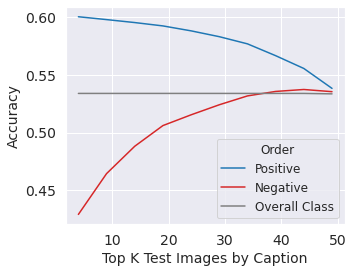

In [19]:
combined_df = pd.concat(df_dict['CLASSIFY'])
acc_df = combined_df.groupby(['K', 'Order']).mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(5,4))
sns.lineplot(data=acc_df, x='K', y='Accuracy', hue='Order',
             hue_order=['Positive', 'Negative', 'Overall Class'], 
             palette=[BLUE, RED, GRAY],
             ax=ax
            )
ax.set_xlabel("Top K Test Images by Caption")
plt.savefig(f'figures/IN_ALL_closest_images.pdf', bbox_inches='tight')
plt.show()

# Subset Intervention

In [ ]:
split = 'unlabeled'
unlabeled_dv = processor.metrics[f'{split}_metrics']['decision_values']
unlabeled_confs = processor.run_dict[split]['confs']
unlabeled_class = processor.metrics[f'{split}_metrics']['classes'] # 0 if female, 1 if male
unlabeled_pred_correct = processor.metrics[f'{split}_metrics']['ypred']
unlabeled_correct = processor.metrics[f'{split}_metrics']['ytrue']

In [ ]:
import scipy.stats as scipy_stats
import pandas as pd
rand_perm = np.arange(len(unlabeled_dv))
np.random.shuffle(rand_perm)

all_dv_inds = []
all_conf_inds = []
all_random_inds = []
K_range = np.arange(50, 201, 50)
for K in K_range:
    dv_inds = []
    conf_inds = []
    random_inds = []
    for c in range(processor.hparams['num_classes']):
        mask = unlabeled_class == c
        masked_indices = np.arange(len(mask))[mask]
        N = len(unlabeled_dv[mask])
        dv_order = masked_indices[np.argsort(unlabeled_dv[mask])]
        conf_order = masked_indices[np.argsort(unlabeled_confs[mask])]
        random_order = masked_indices[np.argsort(rand_perm[mask])]
        dv_inds.append(dv_order[:K])
        conf_inds.append(conf_order[:K])
        random_inds.append(random_order[:K])
        
    all_dv_inds.append(np.concatenate(dv_inds))
    all_conf_inds.append(np.concatenate(conf_inds))
    all_random_inds.append(np.concatenate(random_inds))

In [ ]:
indices_file = torch.load(processor.metrics['args']['indices_file'])
u_indices = indices_file['unlabeled_indices']
for name, order in [("dv", all_dv_inds), ('confs', all_conf_inds), ('random', all_random_inds)]:
    for i in range(len(all_dv_inds)):
        subset_indices_dict = {
            'val_indices': indices_file['val_indices'],
            'train_indices': torch.cat([indices_file['train_indices'],u_indices[order[i]]]),
        }
        torch.save(subset_indices_dict, os.path.join(subset_root, name, f'{i}.pt'))


# Analyze results

In [21]:
saved_caption_and_most_relevant_imgs # (METHOD, target_class, caption_index, direction)

{('CLOSEST',
  0,
  0,
  'pos'): (array([7196, 6480, 8769,  447, 3475, 9642, 4515, 4759, 5716, 2622, 1912,
         8812, 1744, 3248, 5583, 2879, 2892, 6247, 1902, 4313, 1295,  602,
         1022, 2368, 6623, 7138, 9075, 7356, 6549, 7154, 8554, 4305, 1078,
         2857, 6069, 4037, 6601,  153, 9772, 6923, 1103, 4194, 5055, 6462,
         9802, 9008, 6105, 2979, 1365, 6351, 2966, 7851,  422, 9954, 5524,
         7428,  297, 8856, 8163, 1748, 3112, 9473, 4771, 2668,  928, 6355,
         6294, 7742, 4270, 5806, 6772, 4558, 9766, 7165, 5190, 4040, 5703,
         8529, 9539, 3278, 3050, 6408, 9876, 4824, 3100, 9356, 8941, 7209,
         4419, 3048, 2379, 5077,  416, 7115, 9751, 2344, 6696, 7652, 2724,
         9973, 7347, 4415, 9544, 8031, 6036, 3338, 2674, 1076,  473,  581,
         9181, 9946,  116, 2122, 2993, 3445, 4228, 7164, 6361, 8790, 3294,
         5679, 3302, 6619, 3820, 3321,  864, 3148, 6508, 8777, 9980, 8230,
         5295, 6347, 8638, 2461, 6029, 9852, 9459, 9111,  257, 7257,

In [17]:
K_range = np.arange(50, 201, 50)
load_corrects = {}
for t in ['dv', 'confs', 'random', 'baseline']:
    for i in range(len(K_range)):
        for v in range(1):
            if t == 'baseline':
                is_corrects = torch.tensor(test_correct)
            else:
                path = os.path.join("runs", f"cifar_0.25_subset_{t}_{i}/version_{v}/metrics.pt")
                out = torch.load(path)
                is_corrects = (out['test']['preds'] == out['test']['classes'])
            load_corrects[(t, K_range[i])] = is_corrects
            

In [18]:
for k in load_corrects:
    print(k, load_corrects[k].float().mean())

('dv', 50) tensor(0.8245)
('dv', 100) tensor(0.8273)
('dv', 150) tensor(0.8246)
('dv', 200) tensor(0.8304)
('confs', 50) tensor(0.8024)
('confs', 100) tensor(0.8232)
('confs', 150) tensor(0.8212)
('confs', 200) tensor(0.8475)
('random', 50) tensor(0.8257)
('random', 100) tensor(0.8038)
('random', 150) tensor(0.7531)
('random', 200) tensor(0.8371)
('baseline', 50) tensor(0.7905)
('baseline', 100) tensor(0.7905)
('baseline', 150) tensor(0.7905)
('baseline', 200) tensor(0.7905)


a photo of a red bomber


a photo of a ambulance


a photo of a white oscine inside


a photo of a white mouser on the grass


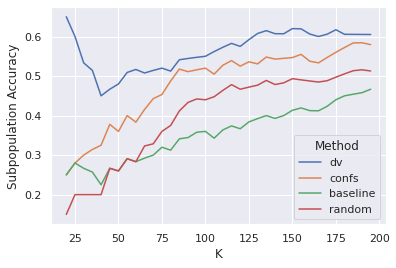

a photo of a kob inside


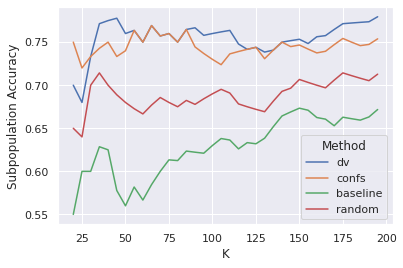

a photo of a black feist


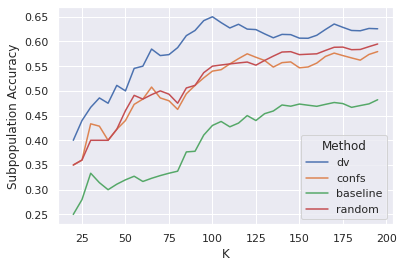

a photo of a agua


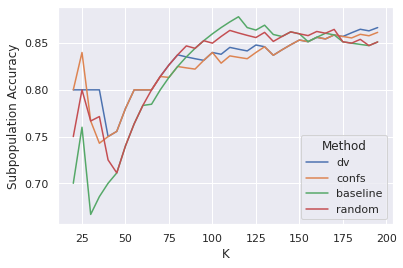

a photo of a protohippus inside


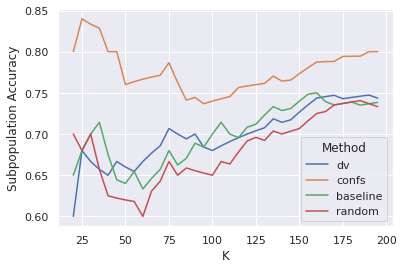

a photo of a racing gig


a photo of a white passenger van


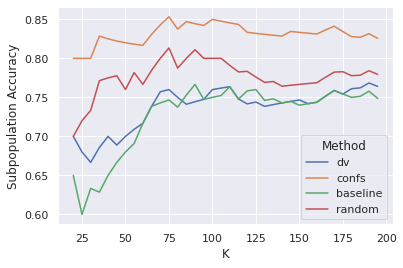

In [21]:
K = 100
METHOD = "CLASSIFY"
dfs = []
for target_c in range(10):
    xaxis = np.arange(20, 200, 5)
    indices, caption = saved_caption_and_most_relevant_imgs[(METHOD, target_c, 0, 'neg')]
    print(caption)
    dv_intervention, _ = get_cdf(load_corrects[('dv', K)][indices].float(), xaxis)
    confs_intervention, _ = get_cdf(load_corrects[('confs', K)][indices].float(), xaxis)
    baseline_intervention, _ = get_cdf(load_corrects[('baseline', K)][indices].float(), xaxis)
    random_intervention, _ = get_cdf(load_corrects[('random', K)][indices].float(), xaxis)

    df = pd.DataFrame()
    df['K'] = xaxis
    df['dv'] = dv_intervention
    df['confs'] = confs_intervention
    df['baseline'] = baseline_intervention
    df['random'] = random_intervention
    df = df.melt('K', var_name='Method', value_name='Subpopulation Accuracy')
    df['Class'] = target_c
    dfs.append(df)

    sns.lineplot(data=df, x='K', y='Subpopulation Accuracy', hue='Method')
    plt.show()

In [22]:
# Average over all classes
combined_df = pd.concat(dfs).reset_index()
sns.lineplot(data=combined_df, x='K', y='Subpopulation Accuracy', hue='Method', ci=False)
plt.show()

# Archive

## Generate Text captions (Now Outdated, use clip_utils above)

In [596]:
cifar_synsets = {
    'dog': 'dog.n.01',
    'bird': 'bird.n.01',
    'automobile': 'car.n.01',
    'airplane': 'airplane.n.01',
    'truck': 'truck.n.01',
    'ship': ['boat.n.01', 'ship.n.01'],
    'frog': 'frog.n.01',
    'cat': 'cat.n.01',
    'horse': 'horse.n.01',
    'deer': ['deer.n.01', 'antelope.n.01']
}
import json
with open("/mnt/nfs/home/datasets/imagenet_wordnet_info/imagenet_class_index.json", 'r') as f:
    imagenet_cls_idx = json.load(f)

In [743]:
from nltk.corpus import words
from nltk.corpus import wordnet
from nltk.corpus import webtext, brown, gutenberg
import nltk
from nltk.corpus import wordnet as wn

# vocab = set([w.lower() for w in words.words()] + [w.lower() for w in wordnet.words()])
vocab = set([w.lower() for w in words.words()])

EXCLUDE_UNCOMMON = True # exclude things not in the vocab
METHOD_TYPE='WordNet' # use ImageNet classes or WordNet Classes

def get_all_hyponyms_base(d):
    hyponyms = d.hyponyms()
    full_set = set(hyponyms)
    full_set.add(d)
    for d2 in hyponyms:
        full_set = full_set.union(get_all_hyponyms_base(d2))
    return full_set

def get_wordnet_set(synset_name):
    full_set = set([])
    for s in synset_name:
        full_set = full_set.union(get_all_hyponyms_base(wn.synset(s)))
    return full_set

def get_imagenet_set(synset_name):
    all_words = []
    for base_name in synset_name:
        base_synset = wn.synset(base_name)
        all_words.append(base_synset)
        for i in range(1000):
            syn1 = imagenet_cls_idx[str(i)][0]
            num1 = int(syn1.split('n')[1])
            wn1 = wn.synset_from_pos_and_offset('n',num1)
            parent = wn1.lowest_common_hypernyms(base_synset)
            if base_synset in parent:
                all_words.append(wn1)
    return all_words


def get_all_hyponyms(synset_name):
    if not isinstance(synset_name, list):
        synset_name = [synset_name]
    if METHOD_TYPE == 'ImageNet':
        full_set = get_imagenet_set(synset_name)
    else:
        full_set = get_wordnet_set(synset_name)
    output = set([])
    for s in full_set:
        lemma = s.lemmas()[0]
#         print(lemma.name(), lemma.count())
        name = ' '.join(lemma.name().lower().split('_'))
        if EXCLUDE_UNCOMMON:
            if not s.name().endswith('n.01'):
                continue
            exclude = False
            if name not in vocab:
                for sub in name.split(' '):
                    if sub not in vocab:
                        print("excluding", name)
                        exclude = True
            if exclude:
                continue
        output.add(name)
    return output

cifar_master_list = {}
for k, v in cifar_synsets.items():
    cifar_master_list[k] = get_all_hyponyms(v)
    
cifar_master_list['reference'] = cifar_label_list

excluding rottweiler
excluding shih-tzu
excluding coondog
excluding american staffordshire terrier
excluding curly-coated retriever
excluding dandie dinmont
excluding wire-haired fox terrier
excluding great pyrenees
excluding german short-haired pointer
excluding black-and-tan coonhound
excluding black-and-tan coonhound
excluding housedog
excluding weimaraner
excluding bouvier des flandres
excluding bouvier des flandres
excluding bouvier des flandres
excluding blenheim spaniel
excluding plott hound
excluding sennenhunde
excluding malamute
excluding brabancon griffon
excluding belgian sheepdog
excluding norwich terrier
excluding flat-coated retriever
excluding bedlington terrier
excluding doberman
excluding coonhound
excluding bullterrier
excluding staffordshire bullterrier
excluding staffordshire bullterrier
excluding lapdog
excluding appenzeller
excluding smooth-haired fox terrier
excluding vizsla
excluding seizure-alert dog
excluding shetland sheepdog
excluding rhodesian ridgeback
ex

In [724]:
adjectives = [None, 'white', 'blue', 'red', 'green', 'black', 'yellow', 'orange', 'brown']

backgrounds = [None, 'outside', 'inside', 'on a black background', 'on a white background', 'on a green background', 'on a blue background']
prepositions = {
    'dog': backgrounds + ['on the grass', 'in a house', 'in the snow', 'in the forest'],
    'cat': backgrounds + ['on the grass', 'in a house', 'in the snow', 'in the forest'],
    'bird': backgrounds + ['flying', 'perched', 'in the air', 'on the ground'],
    'horse': backgrounds + ['in a field', 'in the grass'],
    'airplane': backgrounds + ['flying', 'in the air', 'on the tarmac', 'on a road'],
    'truck': backgrounds + ['on the road', 'parked'],
    'automobile': backgrounds + ['on the road', 'parked'],
    'deer': backgrounds + ['in a field', 'in the grass', 'in the snow', 'in a forest'],
    'ship': backgrounds + ['in the ocean', 'docked', 'in the water', 'on the horizon'],
    'frog': backgrounds + ['in the grass', 'in a pond'],
}

In [749]:

import tqdm
def get_text_data(nouns, adjectives, prepositions):
    class_level_captions = []
    for c in list(nouns):
        for a in adjectives:
            for p in prepositions:
                ending = ' '.join([u for u in [a, c, p] if u != None])
                class_level_captions.append(f'a photo of a {ending}')
    text_data = torch.tensor(svm_utils.evaluate_clip_text(class_level_captions)).cuda()
    return class_level_captions, text_data
    
caption_maps = {}
for k, v in tqdm.tqdm(cifar_master_list.items()):
    print(k)
    if k == 'reference':
        caption_maps[k] = get_text_data(v, [None], [None])
    else:
        text_datas = {
            'all': get_text_data(v, adjectives, prepositions[k]),
            'noun': get_text_data(v, [None], [None]),
            'adj': get_text_data([k], adjectives, [None]),
            'prep': get_text_data([k], [None], prepositions[k]),
        }
        caption_maps[k] = text_datas
    

  0%|          | 0/11 [00:00<?, ?it/s]

dog



100%|██████████| 51/51 [00:03<00:00, 14.42it/s]

100%|██████████| 1/1 [00:00<00:00, 26.14it/s]

100%|██████████| 1/1 [00:00<00:00, 109.18it/s]

  9%|▉         | 1/11 [00:12<02:02, 12.25s/it]

bird



100%|██████████| 238/238 [00:16<00:00, 14.42it/s]

100%|██████████| 3/3 [00:00<00:00, 17.58it/s]

100%|██████████| 1/1 [00:00<00:00, 89.35it/s]

 18%|█▊        | 2/11 [00:41<03:19, 22.20s/it]

automobile



100%|██████████| 8/8 [00:00<00:00, 14.46it/s]

100%|██████████| 1/1 [00:00<00:00, 81.13it/s]

100%|██████████| 1/1 [00:00<00:00, 72.40it/s]

 27%|██▋       | 3/11 [00:50<02:07, 16.00s/it]

airplane



100%|██████████| 9/9 [00:00<00:00, 15.85it/s]

100%|██████████| 1/1 [00:00<00:00, 97.87it/s]

100%|██████████| 1/1 [00:00<00:00, 68.40it/s]

 36%|███▋      | 4/11 [00:58<01:30, 12.94s/it]

truck



100%|██████████| 7/7 [00:00<00:00, 15.23it/s]

100%|██████████| 1/1 [00:00<00:00, 64.25it/s]

100%|██████████| 1/1 [00:00<00:00, 90.22it/s]

 45%|████▌     | 5/11 [01:06<01:07, 11.24s/it]

ship



100%|██████████| 39/39 [00:02<00:00, 14.64it/s]

100%|██████████| 1/1 [00:00<00:00, 32.20it/s]

100%|██████████| 1/1 [00:00<00:00, 98.39it/s]

 55%|█████▍    | 6/11 [01:17<00:56, 11.25s/it]

frog



100%|██████████| 13/13 [00:00<00:00, 14.40it/s]

100%|██████████| 1/1 [00:00<00:00, 63.68it/s]

100%|██████████| 1/1 [00:00<00:00, 120.97it/s]

 64%|██████▎   | 7/11 [01:26<00:41, 10.41s/it]

cat



100%|██████████| 11/11 [00:00<00:00, 15.07it/s]

100%|██████████| 1/1 [00:00<00:00, 84.89it/s]

100%|██████████| 1/1 [00:00<00:00, 106.97it/s]

 73%|███████▎  | 8/11 [01:34<00:29,  9.78s/it]

horse



100%|██████████| 15/15 [00:01<00:00, 14.81it/s]

100%|██████████| 1/1 [00:00<00:00, 57.82it/s]

100%|██████████| 1/1 [00:00<00:00, 118.02it/s]

 82%|████████▏ | 9/11 [01:43<00:18,  9.47s/it]

deer



100%|██████████| 17/17 [00:01<00:00, 14.87it/s]

100%|██████████| 1/1 [00:00<00:00, 62.21it/s]

100%|██████████| 1/1 [00:00<00:00, 91.03it/s]

 91%|█████████ | 10/11 [01:52<00:09,  9.32s/it]

reference



100%|██████████| 11/11 [01:54<00:00, 10.41s/it]


Get CLIP features

In [751]:
clip_features = {
    split: svm_utils.evaluate_clip_features(loader, processor.hparams) for split, loader in processor.loaders.items()
}

with open(svm_model_name, "rb") as f:
    svm_models = pkl.load(f)
    svm_stats = processor.metrics['stats']
svm_pre_process = svm_utils.SVMPreProcessing(mean=svm_stats['mean'], std=svm_stats['std'], do_normalize=True)
preprocessed_clip_features = {
    k: svm_pre_process(v) for k, v in clip_features.items()
}

100%|██████████| 300/300 [00:11<00:00, 26.77it/s]


In [752]:
# sanity check
mask = test_class == 0
assert np.all(svm_models[0].predict(preprocessed_clip_features['test'][mask].numpy()) == test_pred_correct[mask])

In [753]:
def normalize_embeddings(a):
    return a/torch.linalg.norm(a, dim=1, keepdims=True)

def cosine_distance(a, b):
    a_norm = normalize_embeddings(a)
    b_norm = normalize_embeddings(b)
    return a_norm @ b_norm.T

def order_descriptions_l2(clip_data, text_data):
    clip_mean = clip_data.mean(dim=0).unsqueeze(0)
    l2 = torch.linalg.norm(clip_mean - text_data, dim=1).cpu().numpy()
    return l2

def order_descriptions_angle(clip_data, text_data):
    clip_mean = clip_data.mean(dim=0).unsqueeze(0)
    out = cosine_distance(clip_mean, text_data).squeeze(0).cpu().numpy()
    return out

def order_descriptions_svm(clip_data, text_data, c):
    return clf[c].decision_function(text_data.numpy())

In [754]:
for target_c in range(10):
    target_class = CLASS_DICT['CIFAR'][target_c]
    print(target_class)
    get_err = False
    svm_order = processor.orders['test']['SVM'][get_err][target_c]
    class_latents= clip_features['test'][svm_order]
    captions, caption_latents = caption_maps[target_class]['all']
    captions = np.array(captions)
    clip_data = class_latents[-100:].cuda()
    angles = order_descriptions_angle(text_data=caption_latents, clip_data=clip_data)
    print(captions[np.argsort(angles)[::-1]][:10])

    print("---")
    clip_data = class_latents[:100].cuda()
    angles = order_descriptions_angle(text_data=caption_latents, clip_data=clip_data)
    print(captions[np.argsort(angles)[::-1]][:10])
    
    print("----------------")

airplane
['a photo of a white reconnaissance plane outside'
 'a photo of a dive bomber outside' 'a photo of a white monoplane outside'
 'a photo of a reconnaissance plane outside'
 'a photo of a single prop flying'
 'a photo of a white reconnaissance plane'
 'a photo of a black reconnaissance plane outside'
 'a photo of a black reconnaissance plane in the air'
 'a photo of a airliner outside' 'a photo of a delta wing outside']
---
['a photo of a black reconnaissance plane in the air'
 'a photo of a airliner flying' 'a photo of a airliner in the air'
 'a photo of a airliner outside'
 'a photo of a white reconnaissance plane in the air'
 'a photo of a black airliner in the air'
 'a photo of a black reconnaissance plane flying'
 'a photo of a white reconnaissance plane flying' 'a photo of a airliner'
 'a photo of a brown reconnaissance plane in the air']
----------------
automobile
['a photo of a car' 'a photo of a car outside' 'a photo of a car inside'
 'a photo of a gypsy cab outside' '

In [755]:
target_c = 5
target_class = CLASS_DICT['CIFAR'][target_c]
print(target_class, reference_caption[target_c])

captions, caption_latents = caption_maps[target_class]['all']
reference_caption, reference_latents = caption_maps['reference']


preprocessed_caption = svm_pre_process(caption_latents.cpu() - reference_latents[target_c].cpu())
values = svm_models[target_c].decision_function(preprocessed_caption)
selected_caps = np.array(captions)[np.argsort(values)]
print(selected_caps[:10])
print(selected_caps[::-1][:10])

dog


# Subset Intervention

In [297]:
split = 'unlabeled'
unlabeled_dv = processor.metrics[f'{split}_metrics']['decision_values']
unlabeled_confs = processor.run_dict[split]['confs']
unlabeled_class = processor.metrics[f'{split}_metrics']['classes'] # 0 if female, 1 if male
unlabeled_pred_correct = processor.metrics[f'{split}_metrics']['ypred']
unlabeled_correct = processor.metrics[f'{split}_metrics']['ytrue']

In [306]:
import scipy.stats as scipy_stats
import pandas as pd
rand_perm = np.arange(len(unlabeled_dv))
np.random.shuffle(rand_perm)

all_dv_inds = []
all_conf_inds = []
all_random_inds = []
K_range = np.arange(50, 201, 50)
for K in K_range:
    dv_inds = []
    conf_inds = []
    random_inds = []
    for c in range(processor.hparams['num_classes']):
        mask = unlabeled_class == c
        masked_indices = np.arange(len(mask))[mask]
        N = len(unlabeled_dv[mask])
        dv_order = masked_indices[np.argsort(unlabeled_dv[mask])]
        conf_order = masked_indices[np.argsort(unlabeled_confs[mask])]
        random_order = masked_indices[np.argsort(rand_perm[mask])]
        dv_inds.append(dv_order[:K])
        conf_inds.append(conf_order[:K])
        random_inds.append(random_order[:K])
        
    all_dv_inds.append(np.concatenate(dv_inds))
    all_conf_inds.append(np.concatenate(conf_inds))
    all_random_inds.append(np.concatenate(random_inds))

In [307]:
indices_file = torch.load(processor.metrics['args']['indices_file'])
u_indices = indices_file['unlabeled_indices']
for name, order in [("dv", all_dv_inds), ('confs', all_conf_inds), ('random', all_random_inds)]:
    for i in range(len(all_dv_inds)):
        subset_indices_dict = {
            'val_indices': indices_file['val_indices'],
            'train_indices': torch.cat([indices_file['train_indices'],u_indices[order[i]]]),
        }
        torch.save(subset_indices_dict, os.path.join(subset_root, name, f'{i}.pt'))


In [25]:
df.groupby('Method').mean()

K   Flagged  Problematic  Accuracy
Method                                       
confs   62.5  0.499872     0.481625  0.703725
dv      62.5  0.515904     0.499625  0.709725

In [65]:
for c in range(20):
    print(c)
    mask = test_superclass == c
    df = []
    for t in ['dv', 'confs', 'baseline', 'random']:
        for i in range(len(K_range)):
            for v in range(1):
                if t == 'baseline':
                    is_corrects = torch.tensor(test_correct)
                else:
                    path = os.path.join("runs", f"spurious_supercifar100_subset_{t}_{i}/version_{v}/metrics.pt")
                    out = torch.load(path)
                    is_corrects = (out['test']['preds'] == out['test']['classes'])
                flagged_acc = is_corrects[(test_pred_correct == 0) & mask].float().mean().item()
                prob_acc = is_corrects[test_problematic & mask].float().mean().item()
                acc = is_corrects[mask].float().mean().item()
                df.append([t, K_range[i], flagged_acc, prob_acc, acc])
    df = pd.DataFrame(df, columns=['Method', 'K', 'Flagged', "Problematic", 'Accuracy'])
    df = df.groupby(['Method', 'K']).mean()
    display(df)
    print("--")

0


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.406593         0.29     0.606
         50   0.406593         0.29     0.606
         75   0.406593         0.29     0.606
         100  0.406593         0.29     0.606
confs    25   0.402930         0.27     0.594
         50   0.421245         0.33     0.598
         75   0.395604         0.30     0.596
         100  0.443223         0.35     0.618
dv       25   0.410256         0.34     0.606
         50   0.399267         0.36     0.590
         75   0.413919         0.30     0.596
         100  0.457875         0.37     0.618
random   25   0.432234         0.30     0.632
         50   0.410256         0.29     0.604
         75   0.443223         0.37     0.620
         100  0.465201         0.39     0.634

--
1


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.489362         0.40     0.670
         50   0.489362         0.40     0.670
         75   0.489362         0.40     0.670
         100  0.489362         0.40     0.670
confs    25   0.451064         0.27     0.634
         50   0.434043         0.39     0.616
         75   0.438298         0.39     0.614
         100  0.417021         0.30     0.614
dv       25   0.451064         0.40     0.614
         50   0.485106         0.33     0.634
         75   0.510638         0.45     0.662
         100  0.527660         0.45     0.668
random   25   0.455319         0.31     0.628
         50   0.438298         0.37     0.628
         75   0.493617         0.41     0.668
         100  0.497872         0.47     0.672

--
2


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.627451         0.72     0.850
         50   0.627451         0.72     0.850
         75   0.627451         0.72     0.850
         100  0.627451         0.72     0.850
confs    25   0.653595         0.75     0.848
         50   0.666667         0.76     0.850
         75   0.660131         0.73     0.840
         100  0.692810         0.80     0.862
dv       25   0.647059         0.73     0.842
         50   0.699346         0.82     0.872
         75   0.666667         0.75     0.850
         100  0.686275         0.81     0.864
random   25   0.620915         0.70     0.824
         50   0.601307         0.74     0.832
         75   0.627451         0.71     0.840
         100  0.627451         0.76     0.840

--
3


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.522222         0.48     0.698
         50   0.522222         0.48     0.698
         75   0.522222         0.48     0.698
         100  0.522222         0.48     0.698
confs    25   0.605556         0.53     0.742
         50   0.527778         0.57     0.722
         75   0.561111         0.55     0.728
         100  0.550000         0.52     0.716
dv       25   0.550000         0.58     0.734
         50   0.538889         0.55     0.722
         75   0.577778         0.57     0.720
         100  0.583333         0.54     0.738
random   25   0.566667         0.53     0.730
         50   0.550000         0.49     0.720
         75   0.577778         0.57     0.730
         100  0.550000         0.54     0.726

--
4


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.272109         0.15     0.730
         50   0.272109         0.15     0.730
         75   0.272109         0.15     0.730
         100  0.272109         0.15     0.730
confs    25   0.408163         0.38     0.758
         50   0.414966         0.43     0.770
         75   0.401361         0.39     0.752
         100  0.537415         0.54     0.794
dv       25   0.401361         0.34     0.770
         50   0.455782         0.44     0.776
         75   0.462585         0.47     0.784
         100  0.523810         0.54     0.804
random   25   0.278912         0.21     0.722
         50   0.326531         0.23     0.732
         75   0.380952         0.29     0.752
         100  0.380952         0.31     0.770

--
5


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.329897         0.23     0.602
         50   0.329897         0.23     0.602
         75   0.329897         0.23     0.602
         100  0.329897         0.23     0.602
confs    25   0.432990         0.34     0.664
         50   0.474227         0.42     0.660
         75   0.458763         0.44     0.658
         100  0.520619         0.50     0.692
dv       25   0.443299         0.35     0.666
         50   0.443299         0.39     0.648
         75   0.489691         0.46     0.684
         100  0.484536         0.48     0.676
random   25   0.407216         0.28     0.652
         50   0.463918         0.37     0.672
         75   0.422680         0.33     0.672
         100  0.463918         0.41     0.686

--
6


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.550265         0.59     0.770
         50   0.550265         0.59     0.770
         75   0.550265         0.59     0.770
         100  0.550265         0.59     0.770
confs    25   0.608466         0.63     0.808
         50   0.555556         0.57     0.780
         75   0.624339         0.57     0.806
         100  0.645503         0.66     0.814
dv       25   0.587302         0.62     0.794
         50   0.592593         0.62     0.782
         75   0.571429         0.60     0.776
         100  0.597884         0.62     0.796
random   25   0.608466         0.63     0.810
         50   0.576720         0.62     0.770
         75   0.592593         0.63     0.794
         100  0.592593         0.67     0.794

--
7


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.454167         0.31     0.652
         50   0.454167         0.31     0.652
         75   0.454167         0.31     0.652
         100  0.454167         0.31     0.652
confs    25   0.500000         0.35     0.668
         50   0.512500         0.38     0.662
         75   0.533333         0.41     0.710
         100  0.570833         0.46     0.688
dv       25   0.570833         0.49     0.700
         50   0.516667         0.43     0.688
         75   0.554167         0.45     0.716
         100  0.566667         0.48     0.718
random   25   0.475000         0.31     0.676
         50   0.479167         0.28     0.668
         75   0.520833         0.42     0.682
         100  0.504167         0.38     0.668

--
8


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.349206         0.24     0.638
         50   0.349206         0.24     0.638
         75   0.349206         0.24     0.638
         100  0.349206         0.24     0.638
confs    25   0.343915         0.22     0.610
         50   0.301587         0.19     0.616
         75   0.428571         0.37     0.672
         100  0.402116         0.33     0.652
dv       25   0.306878         0.26     0.612
         50   0.380952         0.31     0.642
         75   0.386243         0.36     0.630
         100  0.455026         0.42     0.658
random   25   0.370370         0.24     0.638
         50   0.407407         0.31     0.664
         75   0.338624         0.22     0.636
         100  0.370370         0.25     0.640

--
9


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.632768         0.58     0.804
         50   0.632768         0.58     0.804
         75   0.632768         0.58     0.804
         100  0.632768         0.58     0.804
confs    25   0.649718         0.62     0.816
         50   0.604520         0.56     0.774
         75   0.644068         0.62     0.808
         100  0.615819         0.62     0.800
dv       25   0.621469         0.57     0.796
         50   0.604520         0.54     0.792
         75   0.627119         0.59     0.802
         100  0.672316         0.58     0.816
random   25   0.638418         0.57     0.792
         50   0.632768         0.58     0.804
         75   0.689266         0.66     0.836
         100  0.644068         0.57     0.806

--
10


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.435897         0.48     0.810
         50   0.435897         0.48     0.810
         75   0.435897         0.48     0.810
         100  0.435897         0.48     0.810
confs    25   0.410256         0.41     0.812
         50   0.521368         0.50     0.836
         75   0.478632         0.52     0.824
         100  0.470085         0.51     0.816
dv       25   0.529915         0.52     0.824
         50   0.512821         0.51     0.834
         75   0.504274         0.51     0.818
         100  0.547009         0.58     0.810
random   25   0.376068         0.37     0.798
         50   0.427350         0.46     0.804
         75   0.418803         0.43     0.820
         100  0.427350         0.46     0.802

--
11


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.366667         0.33     0.674
         50   0.366667         0.33     0.674
         75   0.366667         0.33     0.674
         100  0.366667         0.33     0.674
confs    25   0.422222         0.39     0.662
         50   0.427778         0.40     0.676
         75   0.455556         0.51     0.684
         100  0.461111         0.45     0.676
dv       25   0.422222         0.34     0.660
         50   0.483333         0.44     0.702
         75   0.494444         0.49     0.694
         100  0.500000         0.46     0.690
random   25   0.377778         0.30     0.680
         50   0.427778         0.39     0.684
         75   0.405556         0.36     0.668
         100  0.444444         0.37     0.706

--
12


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.459227         0.30     0.596
         50   0.459227         0.30     0.596
         75   0.459227         0.30     0.596
         100  0.459227         0.30     0.596
confs    25   0.480687         0.33     0.612
         50   0.424893         0.31     0.578
         75   0.476395         0.33     0.616
         100  0.480687         0.38     0.602
dv       25   0.454936         0.32     0.608
         50   0.493562         0.34     0.610
         75   0.506438         0.32     0.610
         100  0.476395         0.31     0.602
random   25   0.450644         0.28     0.594
         50   0.497854         0.36     0.626
         75   0.476395         0.30     0.620
         100  0.472103         0.33     0.606

--
13


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.438356         0.41     0.592
         50   0.438356         0.41     0.592
         75   0.438356         0.41     0.592
         100  0.438356         0.41     0.592
confs    25   0.456621         0.52     0.606
         50   0.497717         0.45     0.610
         75   0.474886         0.40     0.608
         100  0.520548         0.42     0.608
dv       25   0.447489         0.39     0.584
         50   0.488584         0.39     0.596
         75   0.488584         0.42     0.588
         100  0.502283         0.47     0.602
random   25   0.479452         0.39     0.600
         50   0.461187         0.35     0.598
         75   0.442922         0.38     0.600
         100  0.497717         0.46     0.628

--
14


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.625000         0.68     0.808
         50   0.625000         0.68     0.808
         75   0.625000         0.68     0.808
         100  0.625000         0.68     0.808
confs    25   0.579545         0.67     0.798
         50   0.545455         0.64     0.782
         75   0.636364         0.71     0.818
         100  0.636364         0.72     0.820
dv       25   0.585227         0.62     0.786
         50   0.602273         0.65     0.802
         75   0.619318         0.71     0.812
         100  0.670455         0.73     0.830
random   25   0.579545         0.62     0.798
         50   0.625000         0.72     0.796
         75   0.613636         0.66     0.808
         100  0.596591         0.63     0.810

--
15


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.327511         0.31     0.484
         50   0.327511         0.31     0.484
         75   0.327511         0.31     0.484
         100  0.327511         0.31     0.484
confs    25   0.366812         0.33     0.480
         50   0.349345         0.33     0.460
         75   0.349345         0.36     0.482
         100  0.353712         0.33     0.464
dv       25   0.349345         0.29     0.476
         50   0.406114         0.34     0.512
         75   0.393013         0.36     0.516
         100  0.336245         0.31     0.470
random   25   0.288210         0.32     0.438
         50   0.323144         0.30     0.476
         75   0.318777         0.37     0.490
         100  0.344978         0.35     0.490

--
16


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.427966         0.34     0.594
         50   0.427966         0.34     0.594
         75   0.427966         0.34     0.594
         100  0.427966         0.34     0.594
confs    25   0.440678         0.38     0.610
         50   0.360170         0.32     0.544
         75   0.385593         0.30     0.558
         100  0.419492         0.35     0.574
dv       25   0.406780         0.33     0.554
         50   0.483051         0.39     0.616
         75   0.415254         0.32     0.580
         100  0.440678         0.40     0.602
random   25   0.389830         0.39     0.582
         50   0.406780         0.32     0.560
         75   0.423729         0.37     0.588
         100  0.474576         0.39     0.620

--
17


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.666667         0.81     0.872
         50   0.666667         0.81     0.872
         75   0.666667         0.81     0.872
         100  0.666667         0.81     0.872
confs    25   0.696296         0.78     0.896
         50   0.711111         0.82     0.906
         75   0.725926         0.83     0.902
         100  0.777778         0.88     0.922
dv       25   0.733333         0.86     0.902
         50   0.711111         0.83     0.902
         75   0.777778         0.87     0.924
         100  0.733333         0.86     0.898
random   25   0.770370         0.89     0.910
         50   0.696296         0.80     0.888
         75   0.733333         0.85     0.902
         100  0.725926         0.85     0.902

--
18


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.621891         0.65     0.780
         50   0.621891         0.65     0.780
         75   0.621891         0.65     0.780
         100  0.621891         0.65     0.780
confs    25   0.621891         0.61     0.780
         50   0.641791         0.70     0.790
         75   0.611940         0.64     0.764
         100  0.646766         0.63     0.786
dv       25   0.601990         0.63     0.770
         50   0.597015         0.60     0.772
         75   0.631841         0.64     0.778
         100  0.671642         0.63     0.794
random   25   0.641791         0.66     0.792
         50   0.641791         0.66     0.790
         75   0.631841         0.61     0.788
         100  0.621891         0.63     0.782

--
19


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.492891         0.39     0.696
         50   0.492891         0.39     0.696
         75   0.492891         0.39     0.696
         100  0.492891         0.39     0.696
confs    25   0.478673         0.38     0.658
         50   0.440758         0.36     0.670
         75   0.478673         0.38     0.694
         100  0.535545         0.44     0.690
dv       25   0.530806         0.44     0.700
         50   0.516588         0.55     0.696
         75   0.535545         0.54     0.700
         100  0.526066         0.50     0.698
random   25   0.454976         0.37     0.688
         50   0.436019         0.32     0.674
         75   0.473934         0.34     0.694
         100  0.483412         0.37     0.684

--


Flagged  Problematic  Accuracy
Method   K                                   
baseline 25   0.469085       0.4345    0.6963
         50   0.469085       0.4345    0.6963
         75   0.469085       0.4345    0.6963
         100  0.469085       0.4345    0.6963
confs    25   0.493102       0.4580    0.7028
         50   0.481349       0.4715    0.6950
         75   0.500766       0.4875    0.7067
         100  0.524272       0.5095    0.7104
dv       25   0.493102       0.4710    0.6999
         50   0.511497       0.4915    0.7094
         75   0.521717       0.5090    0.7120
         100  0.537302       0.5270    0.7176
random   25   0.476495       0.4335    0.6992
         50   0.484415       0.4480    0.6995
         75   0.494379       0.4640    0.7104
         100  0.503832       0.4795    0.7133

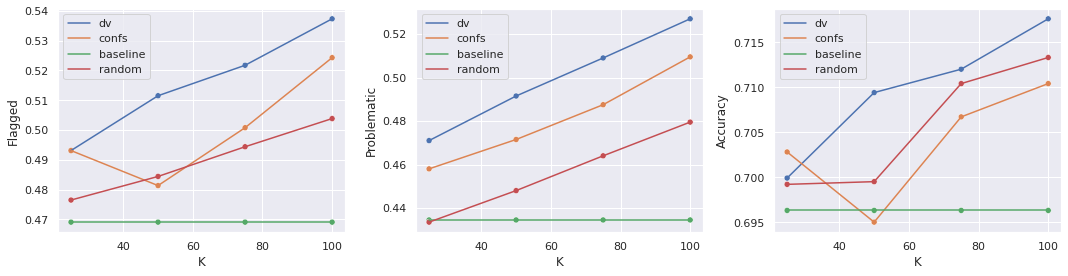

In [87]:
mask = np.ones(len(test_problematic)) == 1
df = []
for t in ['dv', 'confs', 'baseline', 'random']:
    for i in range(len(K_range)):
        for v in range(1):
            if t == 'baseline':
                is_corrects = torch.tensor(test_correct)
            else:
                path = os.path.join("runs", f"spurious_supercifar100_subset_{t}_{i}/version_{v}/metrics.pt")
                out = torch.load(path)
                is_corrects = (out['test']['preds'] == out['test']['classes'])
            flagged_acc = is_corrects[(test_pred_correct == 0) & mask].float().mean().item()
            prob_acc = is_corrects[test_problematic & mask].float().mean().item()
            acc = is_corrects[mask].float().mean().item()
            df.append([t, K_range[i], flagged_acc, prob_acc, acc])
df = pd.DataFrame(df, columns=['Method', 'K', 'Flagged', "Problematic", 'Accuracy'])
display(df.groupby(['Method', 'K']).mean())
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, w in enumerate(['Flagged', "Problematic", 'Accuracy']):
    sns.lineplot(data=df, x='K', y=w, hue='Method', ax=ax[i], markers=True)
    sns.scatterplot(data=df, x='K', y=w, hue='Method', ax=ax[i], markers=True)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], labels[:4])
plt.tight_layout()
plt.show()

In [86]:
labels[:4]

['dv', 'confs', 'baseline', 'random']

K   Flagged  Problematic  Accuracy
Method                                      
confs   0.0  0.012942     0.008732  0.007001
dv      0.0  0.007731     0.004117  0.006926

In [32]:
for i in np.arange(7):
    for n in ['dv', 'confs']:
        print(n)
        out = torch.load(os.path.join(model_root, f"add_30_{n}/version_{i}/metrics.pt"))
        print(out['args']['indices_file'])
        i_file = torch.load(os.path.join(subset_root, n, f"2.pt"))
        print(np.in1d(train_spuriouses[i_file['train_indices']], classes_to_drop).sum())
        print((out['test']['preds'] == out['test']['classes'])[test_problematic].float().mean().item())
        print((out['test']['preds'] == out['test']['classes'])[~test_problematic].float().mean().item())
        print((out['test']['preds'] == out['test']['classes']).float().mean().item())

dv
/mnt/cfs/projects/correlated_errors/experiments/spurious_cifar100/unlabeled/subset_index_files/dv/2.pt
681
0.5304999947547913
0.7307500243186951
0.6906999945640564
confs
/mnt/cfs/projects/correlated_errors/experiments/spurious_cifar100/unlabeled_1_7/subset_index_files/confs/2.pt
641
0.5040000081062317
0.7246249914169312
0.6804999709129333
dv
/mnt/cfs/projects/correlated_errors/experiments/spurious_cifar100/unlabeled/subset_index_files/dv/2.pt
681
0.5285000205039978
0.7308750152587891
0.6904000043869019
confs
/mnt/cfs/projects/correlated_errors/experiments/spurious_cifar100/unlabeled_1_7/subset_index_files/confs/2.pt
641
0.5254999995231628
0.7415000200271606
0.6983000040054321
dv
/mnt/cfs/projects/correlated_errors/experiments/spurious_cifar100/unlabeled/subset_index_files/dv/2.pt
681
0.5339999794960022
0.721875011920929
0.6843000054359436
confs
/mnt/cfs/projects/correlated_errors/experiments/spurious_cifar100/unlabeled_1_7/subset_index_files/confs/2.pt
641
0.515999972820282
0.721624

In [26]:
ds = pytorch_datasets.SuperCIFAR100(root="/mnt/nfs/home/saachij/datasets/cifar100", train=True)
config = f"dataset_configs/supercifar100.yaml"
hparams, train_labels, train_spuriouses = ds_utils.get_all_beton_labels(config, 'train', "/mnt/cfs/projects/correlated_errors/betons", include_spurious=True)


Using default os_cache: False
Using default quasi_random: False
Using default val_aug: None
Using default indices_file: None
Using default val_beton: None
Using default unlabeled_beton: None
Using default loss_upweight: 5
Using default bce: False


100%|██████████| 98/98 [00:00<00:00, 202.08it/s]


In [87]:
np.in1d(train_spuriouses,  classes_to_drop).mean()

0.2

In [30]:
K_range

array([10, 20, 30, 40])

In [154]:
K_range

array([10, 20, 30, 40])

# CLIP

In [6]:
from nltk.corpus import wordnet as wn


In [8]:
import json

In [9]:
with open('src/imagenet_class_index.json', 'r') as f:
    class_indices = json.load(f)

In [10]:
class_indices

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [19]:
synsets = {}
for k, v in class_indices.items():
    ident = int(v[0][1:])
    synsets[int(k)] = wn.synset_from_pos_and_offset('n', ident)
    

In [67]:
def get_hypernyms(curr_list, curr_synset):
    curr_list = curr_list + [curr_synset.name().split('.')[0]]
    for c in curr_synset.hypernyms():
        curr_list = get_hypernyms(curr_list, c)
    return curr_list

In [68]:
ancestor_synsets = {k: get_hypernyms([], synsets[k]) for k in synsets.keys()}

In [69]:
from collections import defaultdict
freq = defaultdict(int)
for k, v_list in ancestor_synsets.items():
    for v in v_list:
        freq[v] += 1

In [70]:
ancestor_counts = [(v, k) for k,v in freq.items()]
ancestor_counts = sorted(ancestor_counts)[::-1]

In [71]:
ancestor_counts

[(1343, 'entity'),
 (1335, 'physical_entity'),
 (1263, 'object'),
 (1247, 'whole'),
 (683, 'artifact'),
 (546, 'organism'),
 (546, 'living_thing'),
 (533, 'animal'),
 (441, 'instrumentality'),
 (340, 'vertebrate'),
 (340, 'chordate'),
 (220, 'mammal'),
 (214, 'placental'),
 (158, 'carnivore'),
 (139, 'device'),
 (130, 'canine'),
 (123, 'domestic_animal'),
 (118, 'dog'),
 (102, 'container'),
 (94, 'covering'),
 (79, 'conveyance'),
 (74, 'vehicle'),
 (65, 'commodity'),
 (64, 'matter'),
 (64, 'consumer_goods'),
 (63, 'hunting_dog'),
 (61, 'structure'),
 (61, 'invertebrate'),
 (59, 'bird'),
 (55, 'food'),
 (51, 'clothing'),
 (47, 'arthropod'),
 (46, 'wheeled_vehicle'),
 (43, 'equipment'),
 (40, 'implement'),
 (38, 'vessel'),
 (36, 'substance'),
 (36, 'reptile'),
 (33, 'self-propelled_vehicle'),
 (32, 'musical_instrument'),
 (31, 'diapsid'),
 (30, 'working_dog'),
 (29, 'instrument'),
 (28, 'solid'),
 (27, 'protective_covering'),
 (27, 'insect'),
 (26, 'terrier'),
 (26, 'garment'),
 (25, 'fu

In [108]:
ancestor_listing = [
    'reptile', 'invertebrate', 'bird', 'canine', 'feline', 'fish', 'amphibian',
    'marsupial', 'aquatic_mammal', 'rodent', 'swine', 'bovid', 'primate',
    'covering', 'aircraft', 'device', 'structure', 'wheeled_vehicle', 'implement',
    'furniture', 'vessel', 'bus', 'equipment', 'food', 'fungus', 'fruit', 'geological_formation',
    'person', 'flower', 'mammal', 'container', 'train', 'vehicle', 'appliance',
    'fabric', 'instrumentality', 'entity'
]

final_grouping_count = defaultdict(int)

for k, v_list in ancestor_synsets.items():
    found = False
    for v in v_list:
        if v in ancestor_listing:
            found = True
            final_grouping_count[v] += 1
            break
    if not found:
        print(synsets[k], v_list)


In [109]:
final_grouping_count

defaultdict(int,
            {'fish': 16,
             'bird': 59,
             'amphibian': 9,
             'reptile': 36,
             'invertebrate': 61,
             'mammal': 30,
             'marsupial': 3,
             'aquatic_mammal': 4,
             'canine': 130,
             'feline': 13,
             'rodent': 6,
             'swine': 3,
             'bovid': 9,
             'primate': 20,
             'device': 124,
             'entity': 59,
             'vehicle': 7,
             'aircraft': 4,
             'structure': 57,
             'wheeled_vehicle': 40,
             'container': 32,
             'equipment': 37,
             'implement': 36,
             'covering': 43,
             'furniture': 21,
             'vessel': 32,
             'fabric': 6,
             'train': 1,
             'instrumentality': 12,
             'appliance': 12,
             'bus': 3,
             'food': 38,
             'fruit': 16,
             'geological_formation': 9,
           

In [1]:
import src.clip_utils as clip_utils

In [3]:
clip_utils.IMAGENET_CLIP_CONFIG['prepositions']

{'tench': [None,
  'outside',
  'inside',
  'on a black background',
  'on a white background',
  'on a green background',
  'on a blue background',
  'on a brown background',
  'in a tank',
  'with a person',
  'underwater'],
 'goldfish': [None,
  'outside',
  'inside',
  'on a black background',
  'on a white background',
  'on a green background',
  'on a blue background',
  'on a brown background',
  'in a tank',
  'with a person',
  'underwater'],
 'great white shark': [None,
  'outside',
  'inside',
  'on a black background',
  'on a white background',
  'on a green background',
  'on a blue background',
  'on a brown background',
  'in a tank',
  'with a person',
  'underwater'],
 'tiger shark': [None,
  'outside',
  'inside',
  'on a black background',
  'on a white background',
  'on a green background',
  'on a blue background',
  'on a brown background',
  'in a tank',
  'with a person',
  'underwater'],
 'hammerhead': [None,
  'outside',
  'inside',
  'on a black background